In [ ]:
#Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
#ω1 = [2,6; 3,4; 3,8; 4,6]
#ω2 = [3,0; 1,-2; 3,-4; 5,-2]

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load data
w1 = np.array([[2,6],[3,4],[3,8],[4,6]])
w2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

In [5]:
#train data
train_X = pd.DataFrame(np.concatenate((w1,w2),axis=0))
train_y = np.array([0] * 4 + [1] * 4)

In [6]:
print(train_X)

   0  1
0  2  6
1  3  4
2  3  8
3  4  6
4  3  0
5  1 -2
6  3 -4
7  5 -2


In [7]:
print(train_y)

[0 0 0 0 1 1 1 1]


Bayes Classifier

In [8]:
#function to find covariance matrix
def covariance_matrix(data):
    mean_vector = np.mean(data, axis=0)
    z_matrix = data - mean_vector
    cov_matrix = np.dot(z_matrix.T, z_matrix) / (data.shape[0] - 1)
    return cov_matrix

In [9]:
def fit_bayes_classifier(train_X, train_y):
    classes = np.unique(train_y)
    cov_mats, cov_dets = {}, {}
    inv_cov_mats = {}
    mean_vectors = {}
    apriori = {}
    for c in classes:
        apriori[c] = len(train_y[train_y == c]) / len(train_y)
        mean_vectors[c] = np.array(train_X[train_y == c].mean())
        cov_mats[c] = covariance_matrix(np.array(train_X[train_y == c]))
        cov_dets[c] = np.linalg.det(cov_mats[c])
        inv_cov_mats[c] = np.linalg.inv(cov_mats[c])
    return cov_dets, inv_cov_mats, apriori, mean_vectors

def predict(apriori, mean_vectors, cov_dets, inv_cov_mats, train_X, train_y, test_point):
    classes = np.unique(train_y)
    dimensions = train_X.shape[1]
    class_probabilities = {}

    for c in classes:
        req_vector = np.array(test_point) - mean_vectors[c]
        numerator = np.exp(-0.5 * np.dot(np.dot(req_vector.T, inv_cov_mats[c]), req_vector))
        denominator = np.power(2 * np.pi, dimensions / 2) * np.power(cov_dets[c], 0.5)
        class_probabilities[c] = apriori * (numerator / denominator)

    return max(zip(class_probabilities.values(), class_probabilities.keys()))[1]

def discriminant_function(apriori, mean_vectors, cov_dets, inv_cov_mats, train_X, train_y, test_point):
    classes = np.unique(train_y)
    dimensions = train_X.shape[1]
    class_probabilities = {}

    for c in classes:
        req_vector = np.array(test_point) - mean_vectors[c]
        numerator = np.exp(-0.5 * np.dot(np.dot(req_vector.T, inv_cov_mats[c]), req_vector))
        denominator = np.power(2 * np.pi, dimensions / 2) * np.power(cov_dets[c], 0.5)
        class_probabilities[c] = apriori * (numerator / denominator)

    return max(class_probabilities.values())

In [10]:
cov_dets, inv_cov_mats, apriori, mean_vectors = fit_bayes_classifier(train_X, train_y)

Plotting

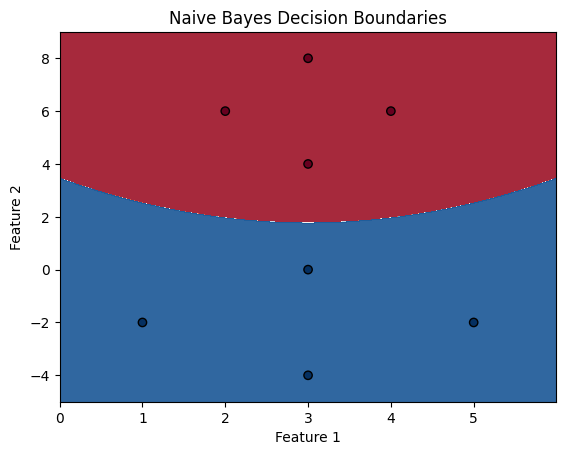

In [11]:
train_X = np.array(train_X)
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = []
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        z.append(predict(0.5, mean_vectors, cov_dets, inv_cov_mats, train_X, train_y, [xx[i][j], yy[i][j]]))
z = np.array(z)
Z = z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.9)
plt.scatter(train_X[:, 0], train_X[:, 1], c = train_y, cmap = plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()

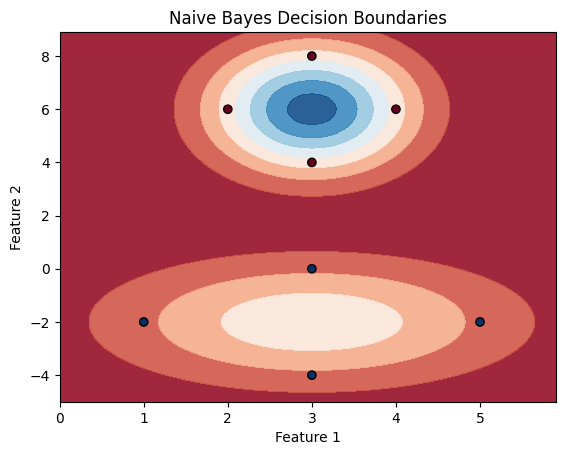

In [12]:
train_X = np.array(train_X)
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
z1 = []
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        z1.append(discriminant_function(0.5, mean_vectors, cov_dets, inv_cov_mats, train_X, train_y, [xx[i][j], yy[i][j]]))
z1 = np.array(z1)
Z1 = z1.reshape(xx.shape)

plt.contourf(xx, yy, Z1, cmap=plt.cm.RdBu, alpha = 0.9)
plt.scatter(train_X[:, 0], train_X[:, 1], c = train_y, cmap = plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()